dataset is a modified varient of https://www.kaggle.com/datasets/naureenmohammad/mmu-iris-dataset

In [ ]:
from google.colab import drive
drive.mount('content/', force_remount = True)

Mounted at content/


In [ ]:
# expecting zip file in mydrive, is a modified version of dataset aswell
!unzip 'content/MyDrive/CSC481_dataset_V3.zip'
print("done")

Archive:  content/MyDrive/CSC481_dataset_V3.zip
   creating: MMU-Iris-Database-ModifiedV3/
   creating: MMU-Iris-Database-ModifiedV3/TestSet/
   creating: MMU-Iris-Database-ModifiedV3/TestSet/aeva/
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/aeva/aeval5.bmp  
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/aeva/aevar5.bmp  
   creating: MMU-Iris-Database-ModifiedV3/TestSet/bryan/
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/bryan/bryanl5.bmp  
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/bryan/bryanr5.bmp  
   creating: MMU-Iris-Database-ModifiedV3/TestSet/chingycl/
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/chingycl/chingycl5.bmp  
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/chingycl/chingycr5.bmp  
   creating: MMU-Iris-Database-ModifiedV3/TestSet/chongpk/
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/chongpk/chongpkl5.bmp  
  inflating: MMU-Iris-Database-ModifiedV3/TestSet/chongpk/chongpkr5.bmp  
   creating: MMU-Iris-Database-ModifiedV3/TestSet/ch

In [ ]:
root_dir = 'MMU-Iris-Database-ModifiedV3/'
train_dir = 'MMU-Iris-Database-ModifiedV3/TrainSet/'
test_dir = 'MMU-Iris-Database-ModifiedV3/TestSet/'
!ls "$root_dir"
#!ls "$train_dir"
#!ls "$test_dir"

TestSet  TrainSet


In [ ]:
!pip install fastbook --upgrade
import fastai
fastai.__version__
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 42.0 MB/s 
     |████████████████████████████████| 197 kB 42.6 MB/s 
     |████████████████████████████████| 60 kB 6.3 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
image_files = get_image_files(train_dir)
print(len(image_files))

360


In [ ]:
people = []  # gets list of all ppl in set from filenames to prevent dupes

for i in image_files:
  user = str(i).split('/')[3]
  user = user.split('.')[0][:-2]
  people.append(user)
people = list(set(people))  # getting rid of duplicates
print(f"there are {len(people)} people")
# list of correct ppl who should result in a true output
correctUser = []       # made as list to allow possibility of more than one user
correctUser.append(people[44])  # numbers from 0-44 are valid
correctUser.append(people[25])
correctUser.append(people[15])
correctUser.append(people[3])
print(f"for this run, the correct user(s) is {correctUser}")

there are 45 people
for this run, the correct user(s) is ['tonghl', 'mimi', 'christine', 'fatma']


In [ ]:
def CorrectUserCheck(x):    # if name is in correctUser list then output true, otherwise false
  x = str(x).split('.')[0][:-2]
  for y in correctUser:
    if x == y:
      return True
  return False

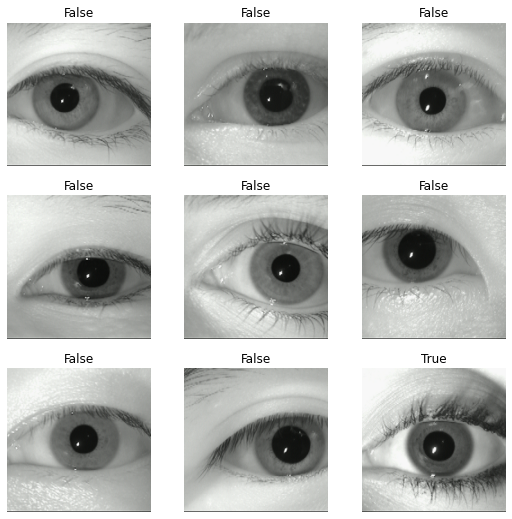

In [ ]:
dls = ImageDataLoaders.from_name_func(
    train_dir, image_files, valid_pct=0.2, seed=42,
    label_func=CorrectUserCheck, item_tfms=Resize(224))
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.248316,0.908125,0.625000,00:09


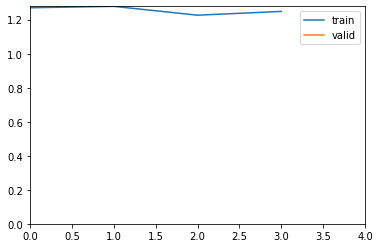

epoch,train_loss,valid_loss,error_rate,time
0,1.157300,0.722431,0.416667,00:08
1,1.025542,1.152672,0.666667,00:07
2,0.984455,2.109768,0.791667,00:07
3,0.911713,1.519668,0.638889,00:07
4,0.863698,1.469576,0.611111,00:07


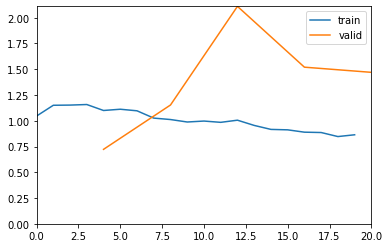

In [ ]:
from torchvision.models.alexnet import AlexNet
from torchvision.models import googlenet
# model = vgg19_bn     # 0.76 acc with 5 finetune
# model = vgg11_bn     # 0.54 acc with 5 finetune
# model = googlenet    # 0.86 acc with 5 finetune
# model = alexnet      # 0.805 acc with 5 finetune
# model = resnet18     # 0.875 acc with 5 finetune
# model = resnet34     # 0.63 acc with 5 finetune
# model = resnet50    # 0.38 acc with 5 finetune


learn = vision_learner(dls, model, metrics=error_rate)
learn.fine_tune(5, cbs=[ShowGraphCallback()])

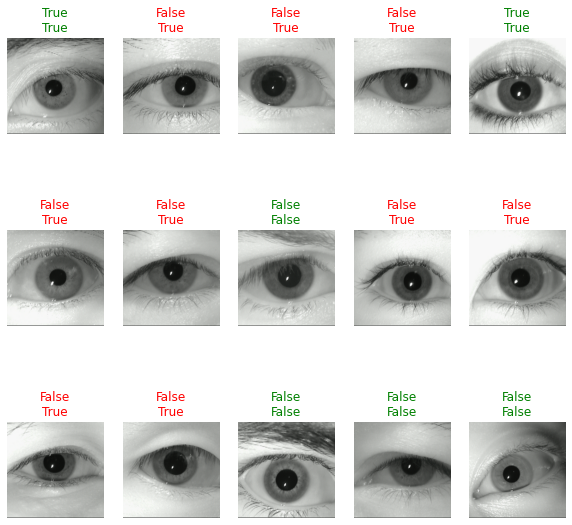

In [ ]:
learn.show_results(max_n = 15, figsize=(10,10))

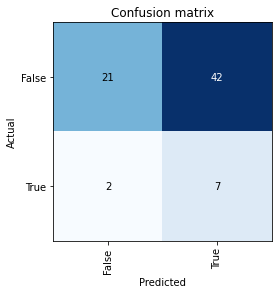

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
correct_count = 0
num_ex = len(learn.dls.valid_ds)

for valid_ex in learn.dls.valid_ds:
  gt = valid_ex[1]
  label, label_idx, probs = learn.predict(valid_ex[0]) # get_preds for batches
  correct_count+=(gt.item() == label_idx)

print(correct_count.item())
print(f'accuracy:{correct_count.item()/num_ex}')

28
accuracy:0.3888888888888889


In [ ]:
test_images = get_image_files(test_dir)
print(len(test_images))

90


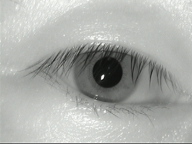

In [ ]:
test_image_pth = test_images[18]   # change the number here to pick different test people (goes in 2's)
img = PILImage.create(test_image_pth)
img.to_thumb(192)

In [ ]:
CorrectUserCheck,_,probs = learn.predict(img)
print(f"correct user(s):{correctUser}")
print(f"this was a picture of {str(test_image_pth).split('/')[3].split('.')[0][:-2]}'s eye")
print("---------------------------")
print(f"Is this a correct user?: {CorrectUserCheck}.")
print(f"Probability it's correct user: {probs[1].item():.6f}")

correct user(s):['mas', 'lec', 'hock', 'liujw']
this was a picture of hock's eye
---------------------------
Is this a correct user?: True.
Probability it's correct user: 0.982987
